<a href="https://colab.research.google.com/github/garg0711/Air_Quality_forecasting/blob/main/Air_Quality_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# url = 'https://archive.ics.uci.edu/ml/datasets/air+quality'

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

In [34]:
data = pd.DataFrame(air_quality.data.features)

In [37]:
data.isin([-200]).sum(axis = 0)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [20]:
# Handling the missing values


# Replace all the -200 to Nan

data = data.replace(to_replace=-200, value=np.nan)


In [21]:
data.isna().sum(axis = 0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [25]:
data  = data.fillna(data.mean())
data

<ipython-input-25-177e74a4653d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data  = data.fillna(data.mean())


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [28]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [31]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

<Axes: ylabel='CO(GT)'>

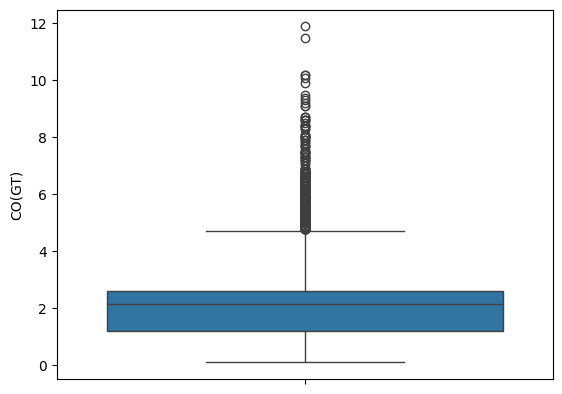

In [32]:
import seaborn as sns
sns.boxplot(data = data['CO(GT)'])

In [41]:
# Forecasting with Prohpet Algo

# Convert date acc to the algo
date_info = pd.to_datetime(data['Date'])

# Convering time accrdinglly
time_info = data['Time'].apply( lambda x : x.replace('.', ':'))


date_time = pd.concat([date_info, time_info], axis = 1)


date_time['ds'] = date_time["Date"].astype(str) + ' ' + date_time["Time"].astype(str)

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00
...,...,...,...
9352,2005-04-04,10:00:00,2005-04-04 10:00:00
9353,2005-04-04,11:00:00,2005-04-04 11:00:00
9354,2005-04-04,12:00:00,2005-04-04 12:00:00
9355,2005-04-04,13:00:00,2005-04-04 13:00:00


In [ ]:
column = ["Date", 'Time']
date_time.drop(columns = column, inplace = True)
date_time

In [46]:
date_time['ds'] = pd.to_datetime(date_time['ds'])

In [48]:
date_time['y'] = data['RH']
date_time

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6
...,...,...
9352,2005-04-04 10:00:00,29.3
9353,2005-04-04 11:00:00,23.7
9354,2005-04-04 12:00:00,18.3
9355,2005-04-04 13:00:00,13.5


In [49]:
!pip install prophet
from prophet import Prophet

In [50]:
# train the model

model = Prophet()
model.fit(date_time)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcjw84cr/xvkfea7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcjw84cr/2og9du3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93461', 'data', 'file=/tmp/tmpxcjw84cr/xvkfea7y.json', 'init=/tmp/tmpxcjw84cr/2og9du3b.json', 'output', 'file=/tmp/tmpxcjw84cr/prophet_modelyc1525ke/prophet_model-20240206155841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:58:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
future = model.make_future_dataframe(periods = 365, freq= 'H')

In [52]:
forecast = model.predict( future )
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(<)

,ds,yhat,yhat_lower,yhat_upper
0,2004-03-10 18:00:00,44.642286,29.562223,59.199829
1,2004-03-10 19:00:00,48.074140,32.273598,62.820053
2,2004-03-10 20:00:00,51.245781,36.433112,66.328247
3,2004-03-10 21:00:00,53.597956,38.110842,68.030539
4,2004-03-10 22:00:00,55.250447,39.078000,70.550125


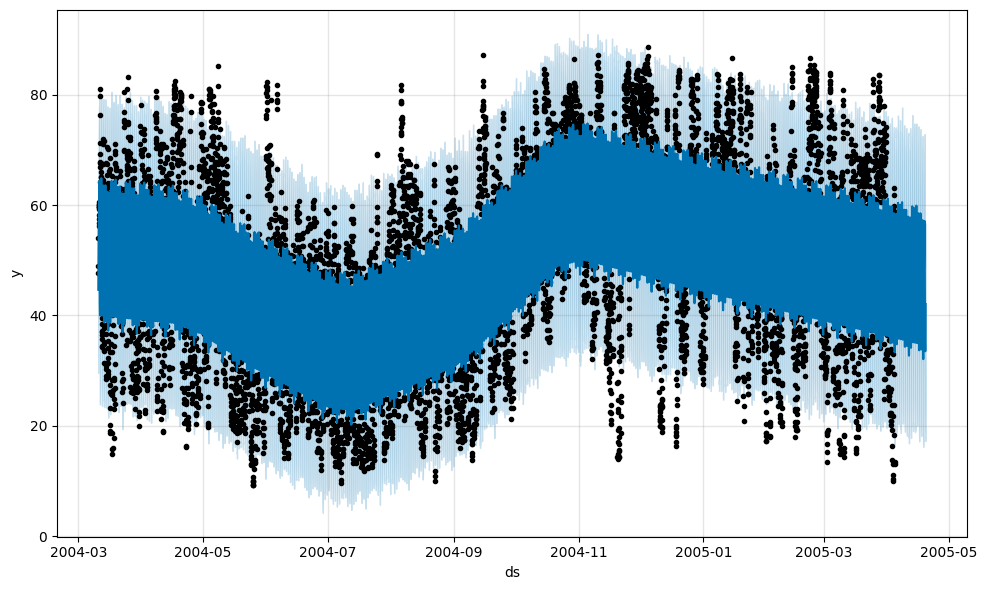

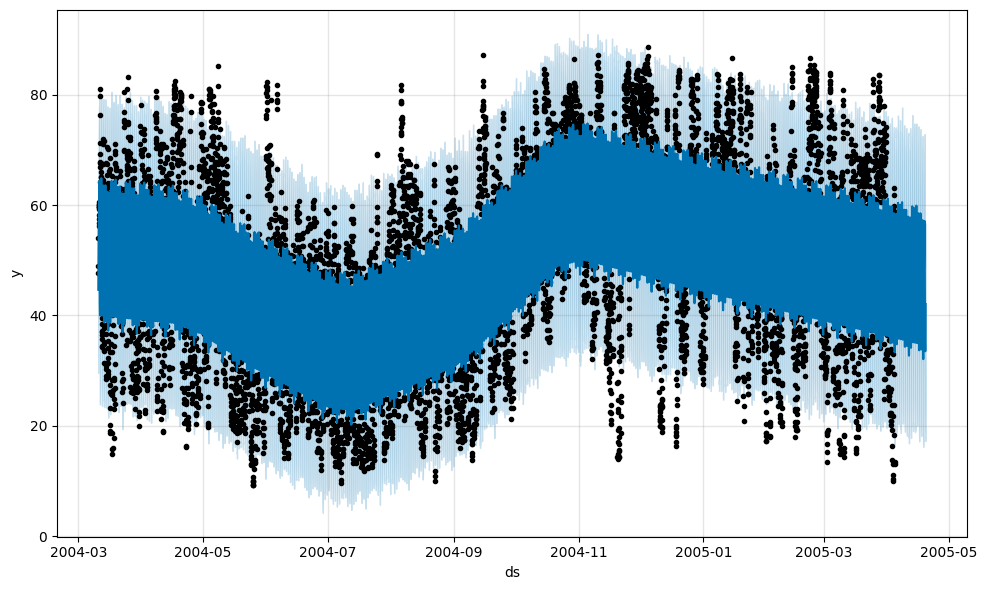

In [54]:
model.plot(forecast)

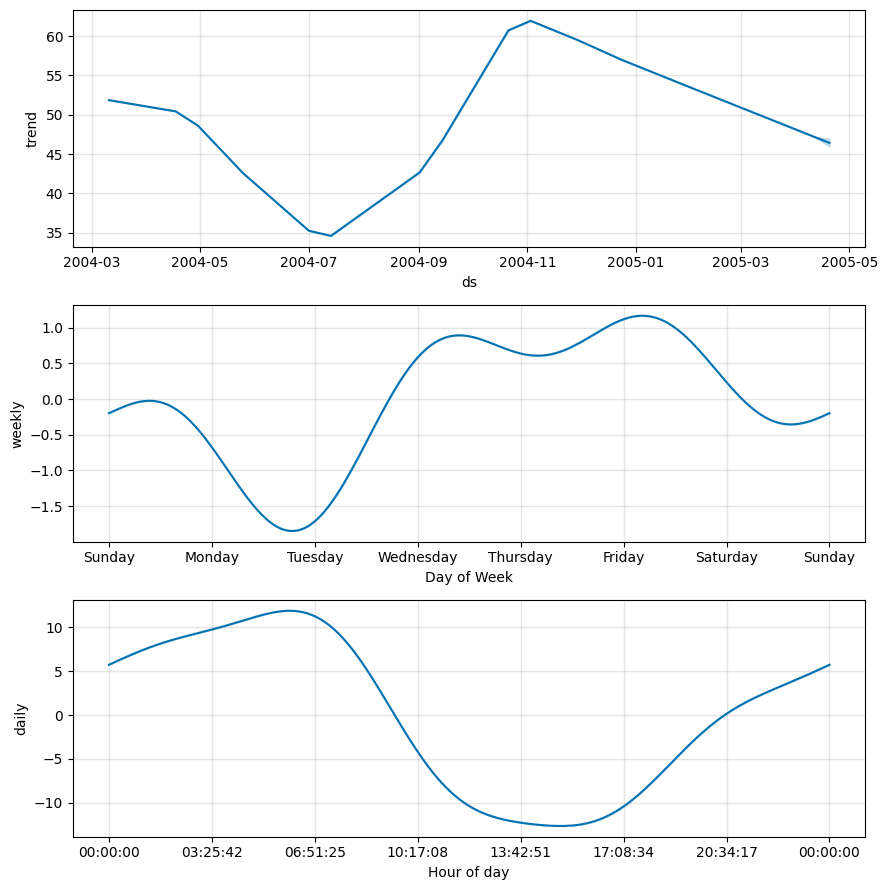

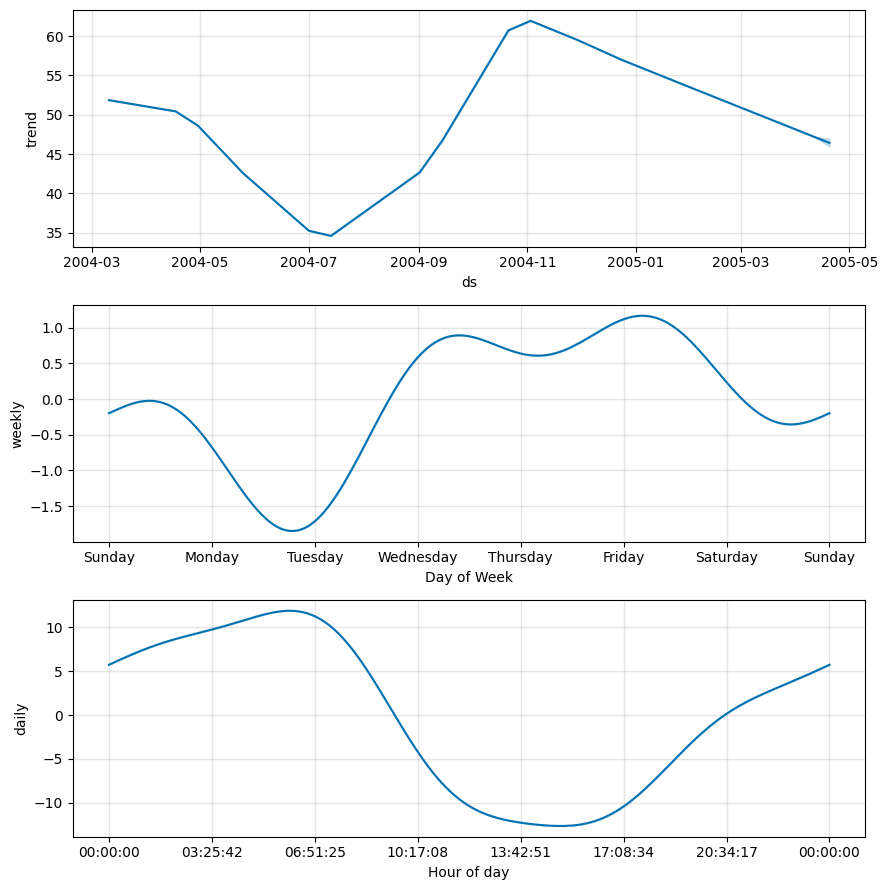

In [55]:
model.plot_components( forecast )